<a href="https://colab.research.google.com/github/Priyal95/WHAT-PARAMETERS-ARE-ASSOCIATED-WITH-TRENDING-VIDEOS-/blob/main/Final_Assignment_Priyal_Shah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import datetime

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/USvideos.csv')

In [ ]:
US_data= data.copy()

In [ ]:
US_data= US_data.dropna()

In [ ]:
#Formating the publish and trending date.
US_data["trending_date"]=pd.to_datetime(US_data["trending_date"],format="%y.%d.%m")
US_data["publish_time"]=pd.to_datetime(US_data["publish_time"])

In [ ]:
#Using lambda function to seprate the Year, Month, Day, Week and time of when it was published and trending.
US_data["Trending_Year"]=US_data["trending_date"].apply(lambda time:time.year)
US_data["Trending_Month"]=US_data["trending_date"].apply(lambda time:time.month)
US_data["Trending_Day"]=US_data["trending_date"].apply(lambda time:time.day)
US_data["Trending_Day_of_Week"]=US_data["trending_date"].apply(lambda time:time.dayofweek)
US_data["Publish_Year"]=US_data["publish_time"].apply(lambda time:time.year)
US_data["Publish_Month"]=US_data["publish_time"].apply(lambda time:time.month)
US_data["Publish_Day"]=US_data["publish_time"].apply(lambda time:time.day)
US_data["Publish_Day_of_Week"]=US_data["publish_time"].apply(lambda time:time.dayofweek)
US_data["Publish_Hour"]=US_data["publish_time"].apply(lambda time:time.hour)

In [ ]:
#formatting the publish date and keeping the format similar to trending date
US_data['publish_time']=pd.to_datetime(US_data["publish_time"],format="%y.%d.%m")

In [ ]:
US_data['Publish_Date']=US_data["publish_time"].apply(lambda time:time.date)

In [ ]:
US_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Trending_Year,Trending_Month,Trending_Day,Trending_Day_of_Week,Publish_Year,Publish_Month,Publish_Day,Publish_Day_of_Week,Publish_Hour,Publish_Date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,14,1,2017,11,13,0,17,2017-11-13
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017,11,14,1,2017,11,13,0,7,2017-11-13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,14,1,2017,11,12,6,19,2017-11-12
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017,11,14,1,2017,11,13,0,11,2017-11-13
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,14,1,2017,11,12,6,18,2017-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29+00:00,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",2018,6,14,3,2018,5,18,4,16,2018-05-18
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,2018,6,14,3,2018,5,18,4,13,2018-05-18
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,2018,6,14,3,2018,5,18,4,17,2018-05-18
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,2018,6,14,3,2018,5,17,3,17,2018-05-17


In [ ]:
Daytrended= pd.to_datetime(US_data['trending_date'] )

In [ ]:
Daypublished= pd.to_datetime(US_data['Publish_Date'] )

In [ ]:
#finding the number of days it took for a video to trend.
US_data['No_of_days_trending']= Daytrended-Daypublished

In [ ]:
US_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Trending_Year,Trending_Month,Trending_Day,Trending_Day_of_Week,Publish_Year,Publish_Month,Publish_Day,Publish_Day_of_Week,Publish_Hour,Publish_Date,No_of_days_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,14,1,2017,11,13,0,17,2017-11-13,1 days
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017,11,14,1,2017,11,13,0,7,2017-11-13,1 days
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,14,1,2017,11,12,6,19,2017-11-12,2 days
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017,11,14,1,2017,11,13,0,11,2017-11-13,1 days
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,14,1,2017,11,12,6,18,2017-11-12,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29+00:00,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",2018,6,14,3,2018,5,18,4,16,2018-05-18,27 days
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,2018,6,14,3,2018,5,18,4,13,2018-05-18,27 days
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,2018,6,14,3,2018,5,18,4,17,2018-05-18,27 days
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,2018,6,14,3,2018,5,17,3,17,2018-05-17,28 days


In [ ]:
Limit35= US_data[(US_data['No_of_days_trending'] <= '35days')]

In [ ]:
Limit35

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Trending_Year,Trending_Month,Trending_Day,Trending_Day_of_Week,Publish_Year,Publish_Month,Publish_Day,Publish_Day_of_Week,Publish_Hour,Publish_Date,No_of_days_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017,11,14,1,2017,11,13,0,17,2017-11-13,1 days
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017,11,14,1,2017,11,13,0,7,2017-11-13,1 days
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,14,1,2017,11,12,6,19,2017-11-12,2 days
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017,11,14,1,2017,11,13,0,11,2017-11-13,1 days
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017,11,14,1,2017,11,12,6,18,2017-11-12,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29+00:00,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",2018,6,14,3,2018,5,18,4,16,2018-05-18,27 days
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,2018,6,14,3,2018,5,18,4,13,2018-05-18,27 days
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,2018,6,14,3,2018,5,18,4,17,2018-05-18,27 days
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,2018,6,14,3,2018,5,17,3,17,2018-05-17,28 days


In [ ]:
Limit35["No_of_days_trending"] = Limit35["No_of_days_trending"].apply(str).str.replace('.', ',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Limit35[['Numbers', 'B']] = Limit35["No_of_days_trending"] .str.split(' ', 1, expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


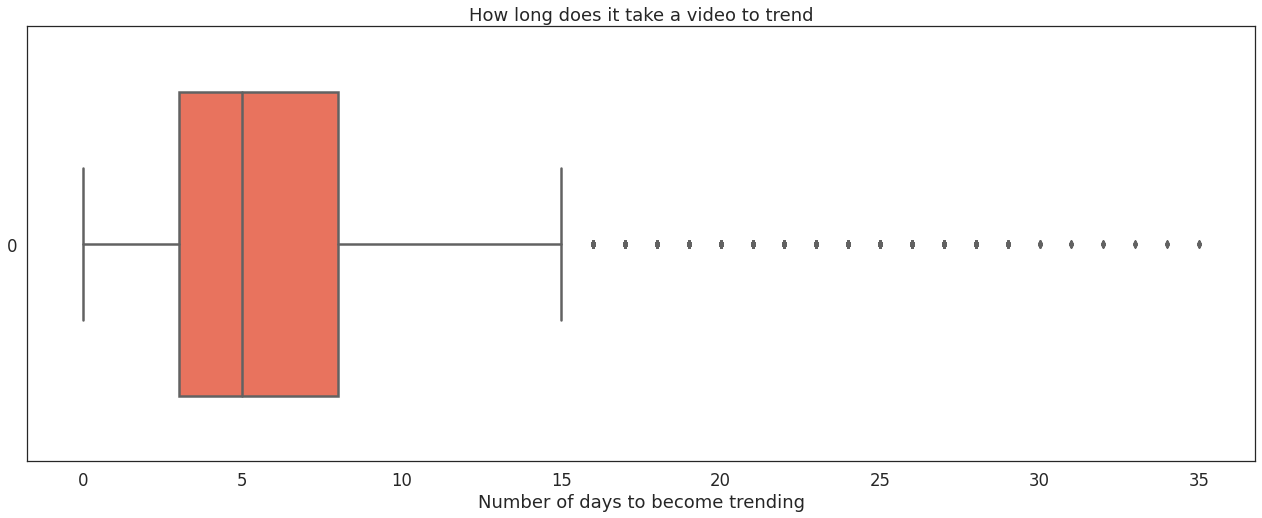

In [ ]:
plt.figure(figsize=(22, 8))
sns.set(font_scale=1.5,style="white")
illustration1= sns.boxplot(data=Limit35.Numbers, orient="h", color="tomato",width=0.7,linewidth=2.5).set(title='How long does it take a video to trend',xlabel='Number of days to become trending')


In [ ]:
Trendingdays= US_data.groupby(by=['Trending_Day_of_Week','views'],as_index=False).size().rename(columns={'Trending_Day_of_Week':'Days_of_the_week'})

NameError: ignored

In [ ]:
Trendingdays_views= Trendingdays.groupby(by=['Days_of_the_week'],as_index=False).sum()

In [ ]:
Trendingdays_views

,Days_of_the_week,views,size
0,0,13850067896,5715
1,1,14137284627,5912
2,2,13879789216,5712
3,3,14092632444,5714
4,4,13257169002,5711
5,5,13356023453,5906
6,6,12993633807,5709


In [ ]:
Publishingdays = US_data.groupby(by=['Publish_Day_of_Week','views'],as_index=False).size().rename(columns={'Publish_Day_of_Week':'Days_of_the_week'})

In [ ]:
Publishingdays_views =Publishingdays.groupby(by=['Days_of_the_week'],as_index=False).sum()

In [ ]:
Publishingdays_views

,Days_of_the_week,views,size
0,0,12201297773,6080
1,1,13542296727,6686
2,2,13612385939,6687
3,3,15860747787,6877
4,4,23346563265,6845
5,5,6166528221,3564
6,6,10827553209,3640


In [ ]:
def convert(i):
  if i == 0:
    return ('Monday')
  elif i == 1:
   return ('Tuesday')
  elif i == 2:
    return ('Wednesday')
  elif i == 3:
    return ('Thursday')
  elif i == 4:
    return ('Friday')
  elif i == 5:
    return ('Saturday')
  elif i == 6:
    return ('Sunday')
  return i

In [ ]:
 Publishingdays_views['Days']=Publishingdays_views.Days_of_the_week.transform(convert)

In [ ]:
Publishingdays_views=Publishingdays_views.rename(columns={'size':'Total_Content'})

In [ ]:
Publishingdays_views

,Days_of_the_week,views,Total_Content,Days
0,0,12201297773,6080,Monday
1,1,13542296727,6686,Tuesday
2,2,13612385939,6687,Wednesday
3,3,15860747787,6877,Thursday
4,4,23346563265,6845,Friday
5,5,6166528221,3564,Saturday
6,6,10827553209,3640,Sunday


In [ ]:
Publishingdays_views['Views_in_Billions']=(round(Publishingdays_views.views/1000000000,2))

In [ ]:
Publishingdays_views

,Days_of_the_week,views,Total_Content,Days,Views_in_Billions
0,0,12201297773,6080,Monday,12.20
1,1,13542296727,6686,Tuesday,13.54
2,2,13612385939,6687,Wednesday,13.61
3,3,15860747787,6877,Thursday,15.86
4,4,23346563265,6845,Friday,23.35
5,5,6166528221,3564,Saturday,6.17
6,6,10827553209,3640,Sunday,10.83


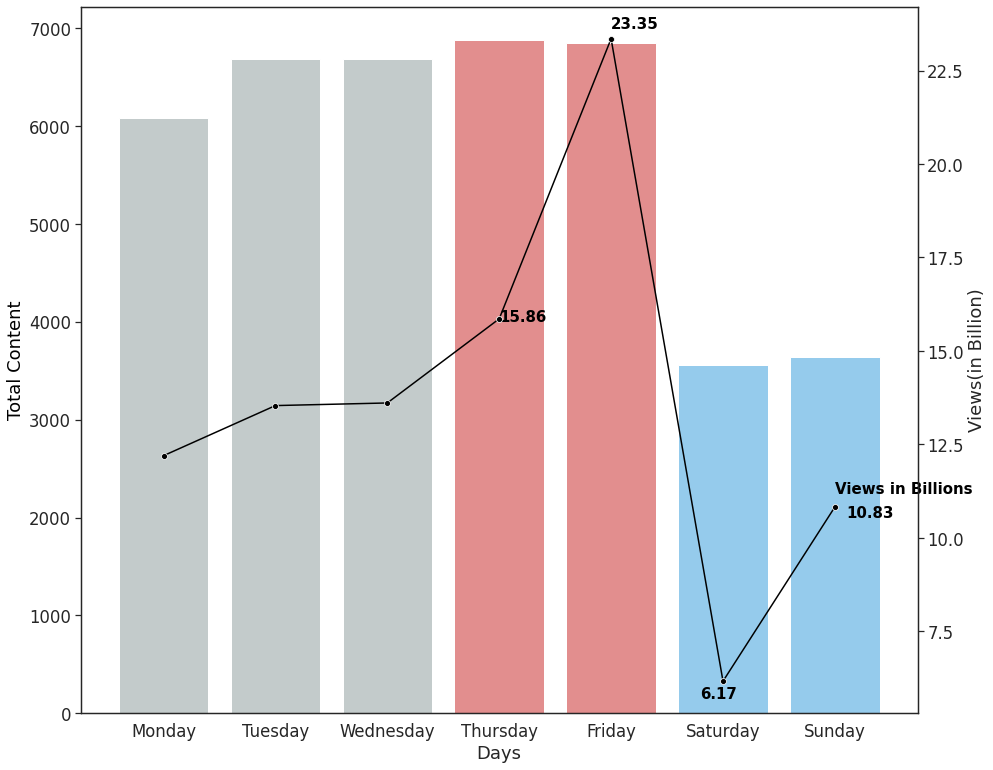

In [ ]:
fig,ax1, = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

chart1 =sns.barplot(x = Publishingdays_views.Days, y = Publishingdays_views.Total_Content, ax = ax1,palette=['#C1CDCD','#C1CDCD','#C1CDCD','#F08080','#F08080','#87CEFA','#87CEFA']) # plots the first set of data, and sets it to ax1
chart2= sns.lineplot(x = Publishingdays_views.Days, y = Publishingdays_views.Views_in_Billions, marker = 'o', color = 'black', ax = ax2,legend='full')


ax1.text(x=6, y=2250, s='Views in Billions', size='small', color='black', weight='semibold')
#num_views = Publishingdays_views.Views_in_Billions[-5:-1]
ax1.text(x=6.1, y=2005, s=10.83, size='small',color='black',weight='semibold')
ax1.text(x=4.8, y=150, s=6.17, size='small',color='black',weight='semibold')
ax1.text(x=4, y=7000, s=23.35, size='small',color='black',weight='semibold')
ax1.text(x=3, y=4000, s=15.86, size='small',color='black',weight='semibold')

#these lines add the annotations for the plot. 
plt.rcParams["figure.figsize"] = (15,13)
ax1.set_xlabel('Days')
ax1.set_ylabel('Total Content', color='black')
ax2.set_ylabel('Views(in Billion)')


plt.show()

fig.savefig('illustration2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')